# Vương Thanh Linh
# MSSV: 21521082

In [105]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [106]:
df = pd.read_csv("groceries.csv", sep="\t", header=None, engine="python")
df.head(10)

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
5,"whole milk,butter,yogurt,rice,abrasive cleaner"
6,rolls/buns
7,"other vegetables,UHT-milk,rolls/buns,bottled b..."
8,potted plants
9,"whole milk,cereals"


## Xử lý dữ liệu chuỗi

In [107]:
df = df[0].str.split(',', expand=True)

In [108]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,whole milk,butter,yogurt,rice,abrasive cleaner,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,rolls/buns,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,potted plants,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,whole milk,cereals,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9835 non-null   object
 1   1       7676 non-null   object
 2   2       6033 non-null   object
 3   3       4734 non-null   object
 4   4       3729 non-null   object
 5   5       2874 non-null   object
 6   6       2229 non-null   object
 7   7       1684 non-null   object
 8   8       1246 non-null   object
 9   9       896 non-null    object
 10  10      650 non-null    object
 11  11      468 non-null    object
 12  12      351 non-null    object
 13  13      273 non-null    object
 14  14      196 non-null    object
 15  15      141 non-null    object
 16  16      95 non-null     object
 17  17      66 non-null     object
 18  18      52 non-null     object
 19  19      38 non-null     object
 20  20      29 non-null     object
 21  21      18 non-null     object
 22  22      14 non-null     

## Chuyển thành 2d array

In [110]:
basket = np.array(df)

In [111]:
basket

array([['citrus fruit', 'semi-finished bread', 'margarine', ..., None,
        None, None],
       ['tropical fruit', 'yogurt', 'coffee', ..., None, None, None],
       ['whole milk', None, None, ..., None, None, None],
       ...,
       ['chicken', 'citrus fruit', 'other vegetables', ..., None, None,
        None],
       ['semi-finished bread', 'bottled water', 'soda', ..., None, None,
        None],
       ['chicken', 'tropical fruit', 'other vegetables', ..., None, None,
        None]], dtype=object)

## Loại bỏ các giá trị None

In [112]:
basket = [[x for x in row if str(x) != 'None'] for row in basket]
basket

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

## Chuyển sang dạng OneHot Encoding

In [113]:
te = TransactionEncoder()
encoded = te.fit_transform(basket)
encoded

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [114]:
newDf = pd.DataFrame(encoded, columns=te.columns_)

In [115]:
newDf.head(10)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Thuật toán Apriori

In [116]:
time_ap = []
for i in range(1, 11):
    min_supp = np.round(i/100, 2)
    print("Min_supp = ", str(min_supp))
    sTime = time.time()
    fp_apri = apriori(newDf, min_support = min_supp, use_colnames=True)
    eTime = time.time()
    print("Thời gian chạy = ", str(eTime - sTime))
    time_ap.append(eTime - sTime)
    print("Tập phổ biến: \n", fp_apri)
    print("--------------------------------------------------------------")

Min_supp =  0.01
Thời gian chạy =  0.47103309631347656
Tập phổ biến: 
       support                                       itemsets
0    0.033452                                     (UHT-milk)
1    0.017692                                (baking powder)
2    0.052466                                         (beef)
3    0.033249                                      (berries)
4    0.026029                                    (beverages)
..        ...                                            ...
328  0.011998  (root vegetables, tropical fruit, whole milk)
329  0.014540          (yogurt, root vegetables, whole milk)
330  0.010473                     (yogurt, soda, whole milk)
331  0.015150           (yogurt, tropical fruit, whole milk)
332  0.010880       (yogurt, whipped/sour cream, whole milk)

[333 rows x 2 columns]
--------------------------------------------------------------
Min_supp =  0.02
Thời gian chạy =  0.14196372032165527
Tập phổ biến: 
       support                          

## Thuật toán FP-Growth

In [117]:
time_fp = []
for i in range(1, 11):
    min_supp = np.round(i/100, 2)
    print("Min_supp = ", str(min_supp))
    sTime = time.time()
    fp_fpgrowth = fpgrowth(newDf, min_support = min_supp, use_colnames=True)
    eTime = time.time()
    print("Thời gian chạy = ", str(eTime - sTime))
    time_fp.append(eTime - sTime)
    print("Tập phổ biến: \n", fp_fpgrowth)
    print("--------------------------------------------------------------")

Min_supp =  0.01
Thời gian chạy =  0.23899197578430176
Tập phổ biến: 
       support                         itemsets
0    0.082766                   (citrus fruit)
1    0.058566                      (margarine)
2    0.017692            (semi-finished bread)
3    0.139502                         (yogurt)
4    0.104931                 (tropical fruit)
..        ...                              ...
328  0.010168  (frozen vegetables, rolls/buns)
329  0.012405      (yogurt, frozen vegetables)
330  0.014235       (onions, other vegetables)
331  0.012100             (onions, whole milk)
332  0.010778      (sliced cheese, whole milk)

[333 rows x 2 columns]
--------------------------------------------------------------
Min_supp =  0.02
Thời gian chạy =  0.16100335121154785
Tập phổ biến: 
       support                           itemsets
0    0.082766                     (citrus fruit)
1    0.058566                        (margarine)
2    0.139502                           (yogurt)
3    0.1049

## Bảng thời gian thực thi

In [118]:
detail_exe = {'Min_supp': [np.round(i/100, 2) for i in range(1, 11)],'Executive time of Apriori': time_ap, 'Executive time of FP-Growth': time_fp}
table = pd.DataFrame(detail_exe)
table

,Min_supp,Executive time of Apriori,Executive time of FP-Growth
0,0.01,0.471033,0.238992
1,0.02,0.141964,0.161003
2,0.03,0.096997,0.128960
3,0.04,0.042002,0.312976
4,0.05,0.033000,0.107036
5,0.06,0.019003,0.084010
6,0.07,0.017962,0.072004
7,0.08,0.012055,0.111034
8,0.09,0.008946,0.072004
9,0.10,0.007041,0.059011


## Vẽ biểu đồ so sánh thời gian chạy

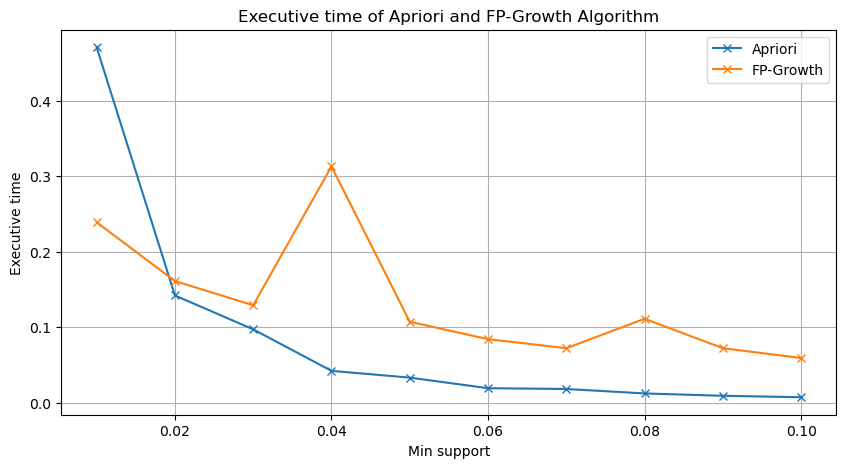

In [119]:
plt.figure(figsize=(10,5))
plt.plot(table['Min_supp'], table['Executive time of Apriori'], label='Apriori', marker='x')
plt.plot(table['Min_supp'], table['Executive time of FP-Growth'], label='FP-Growth', marker='x')
plt.xlabel('Min support')
plt.ylabel('Executive time')
plt.title('Executive time of Apriori and FP-Growth Algorithm')
plt.legend()
plt.grid(True)
plt.show()

**Nhận xét**: </br>
- *Min_supp* càng tăng thì thời gian thực hiện của 2 thuật toán đều có xu hướng giảm
- Thời gian chạy trung bình của thuật toán Apriori nhanh hơn so với FP-Growth </br>

**Giải thích**: </br>
- Apriori xét trên tất cả tập con có thể để tìm tập phổ biến - sẽ chạy càng lâu do nó phải xét trên tất cả tập con.
- FP-growth tìm tập phổ biến bằng cách xét trên cây tăng trưởng mục tiêu - sẽ chạy nhanh hơn hẳn do không phải xét trên tất cả các tập con.